In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

style_file = os.path.expandvars('$I3_SRC/LeptonInjector/python/hnl_mpl_plotstyle.mplstyle')
plt.style.use('../ultrasurfaces_plotstyle.mplstyle')

Check travelled lengths (calculation from Andrii's thesis)

In [2]:
from generator import get_length_travelled

In [3]:
cos_zens = np.linspace(-1., 1., 100)

In [4]:
lengths = get_length_travelled(np.arccos(cos_zens))

Text(0, 0.5, 'Distance travelled [km]')

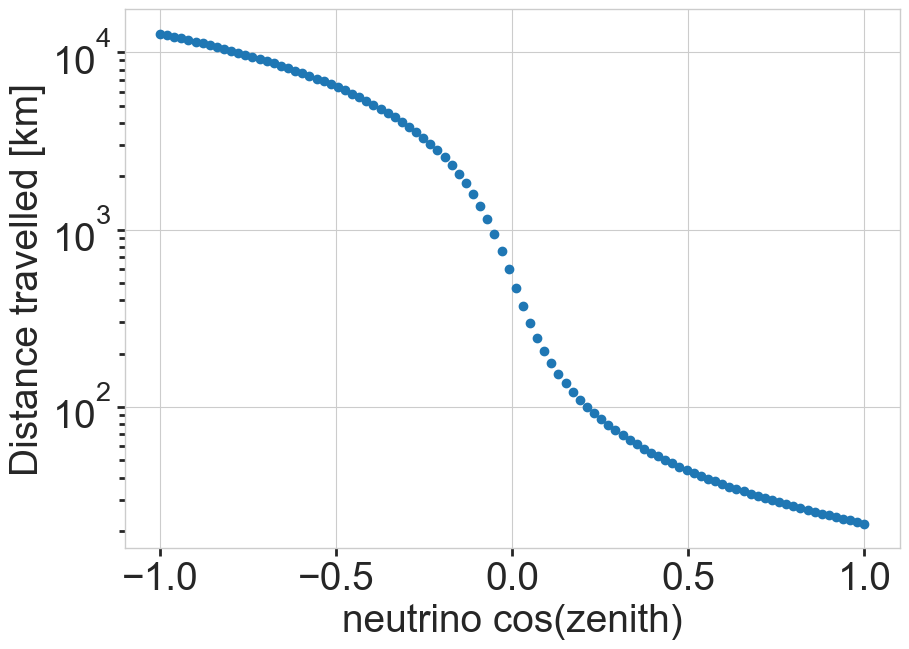

In [5]:
plt.scatter(cos_zens, lengths)
plt.yscale('log')
plt.xlabel('neutrino cos(zenith)')
plt.ylabel('Distance travelled [km]')

Check oscillation probabilities

In [6]:
from generator import survival_probability

In [7]:
lengths = np.linspace(0., 5., 100)
prop = survival_probability(lengths, np.ones_like(lengths),
    delta_msq=1., sinsq_2theta=0.3)

Compare Figure 3.1 in Andrii's thesis, (assuming he used an energy of 1GeV...)

Text(0, 0.5, 'Survival propability')

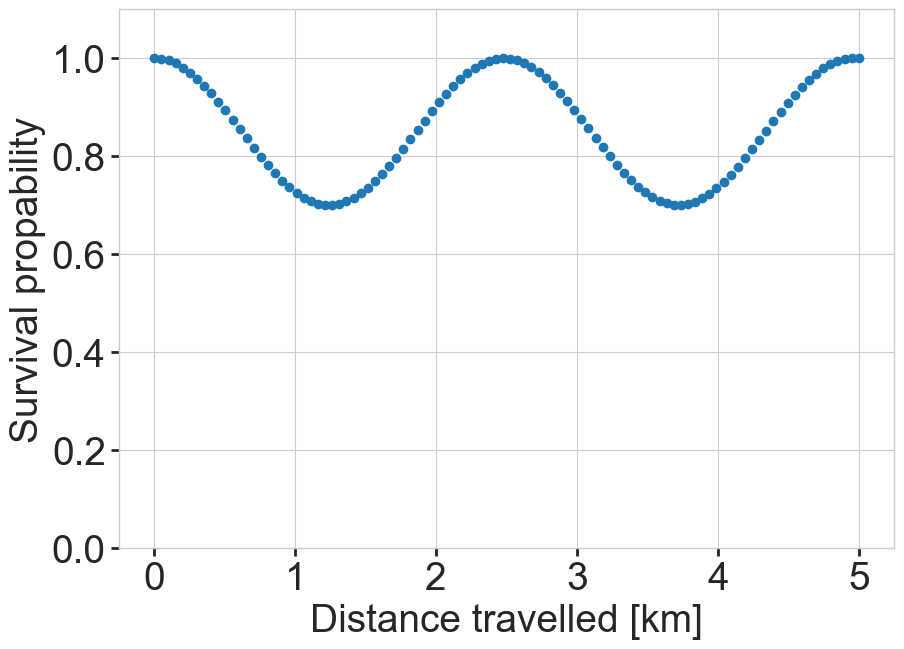

In [8]:
plt.scatter(lengths, prop)
plt.ylim(0., 1.1)
plt.xlabel('Distance travelled [km]')
plt.ylabel('Survival propability')

Check event generation

In [9]:
from generator import Response

In [10]:
response = Response(0., 0.1)

In [11]:
response

Response(mu=0.0, sigma=0.1)

In [12]:
from generator import Generator

In [13]:
# gen = Generator(10000, 2.7, response)  # depr. used power law
gen = Generator(10000, response)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [14]:
events = gen.get_events()

Check power law distribution

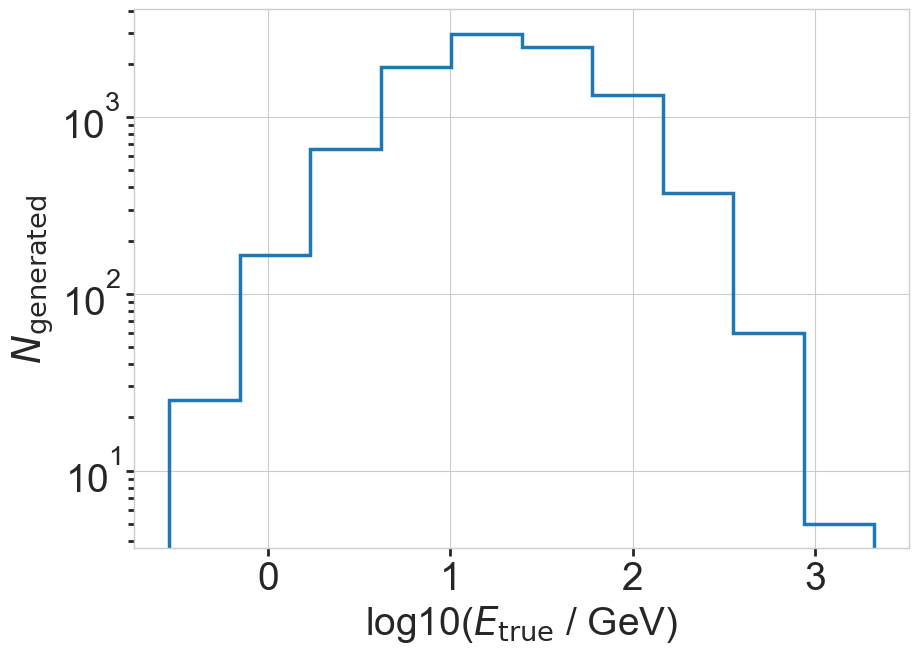

In [15]:
plt.hist(np.log10(events['true_energy']), histtype='step', lw=2.5)
plt.yscale('log')
plt.xlabel(r'log10($E_{\rm true}$ / GeV)')
plt.ylabel(r'$N_{\rm generated}$')

plt.show()

Test 2D oscillogram obtained from generator

In [16]:
coszen_vals = np.linspace(-1., 0., 100)
energy_vals = np.logspace(0.7, 2.5, 50)

length_vals = get_length_travelled(np.arccos(coszen_vals))

In [17]:
coszen_grid, energy_grid = np.meshgrid(coszen_vals, energy_vals)
length_grid, energy_grid = np.meshgrid(length_vals, energy_vals)

In [18]:
survival_prop_values = gen.survival_prob(length_grid, energy_grid)

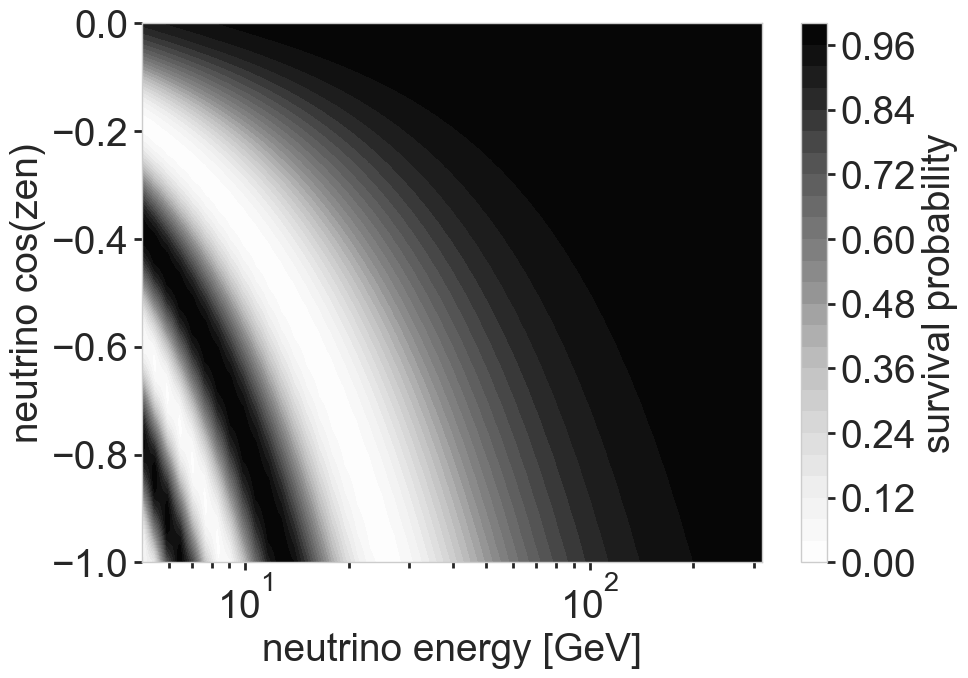

In [19]:
h = plt.contourf(energy_grid, coszen_grid, survival_prop_values, levels=30)

plt.colorbar(label='survival probability')

plt.xlabel('neutrino energy [GeV]')
plt.xscale('log')
plt.ylabel('neutrino cos(zen)')

plt.show()

Check detector response, i.e. reconstructed energy:

(-1.0, 1.0)

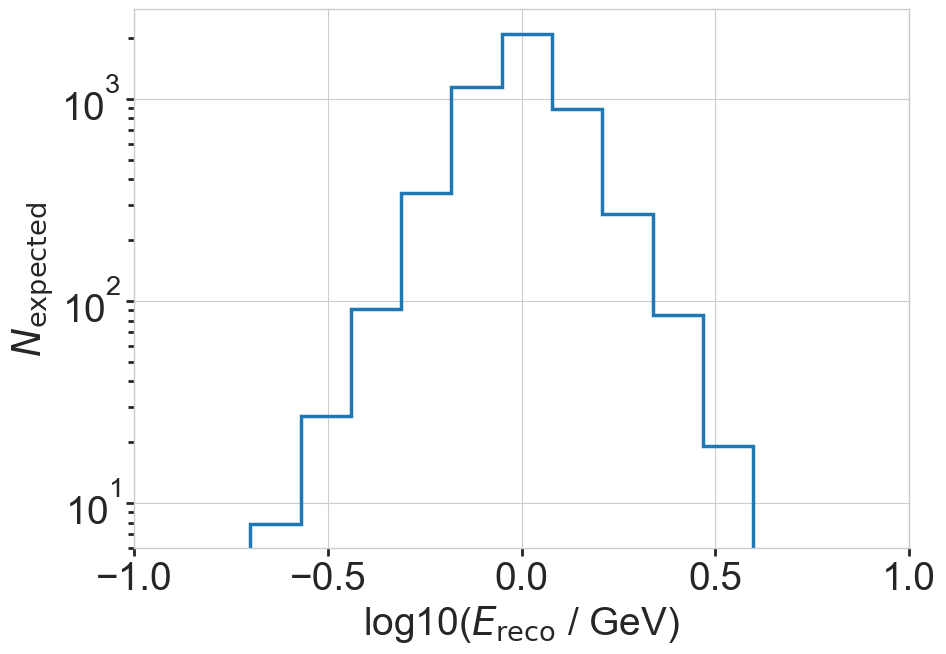

In [20]:
plt.hist(np.log10(events['reco_energy']), weights=events['weights'], histtype='step', lw=2.5)
plt.yscale('log')
plt.xlabel(r'log10($E_{\rm reco}$ / GeV)')
plt.ylabel(r'$N_{\rm expected}$')
plt.xlim(-1., 1.)

# # show true energy
# plt.hist(np.log10(events['true_energy'][mask]), weights=events['weights'][mask], histtype='step', lw=2.5)

Check a small range of true energies:

(-1.0, 1.0)

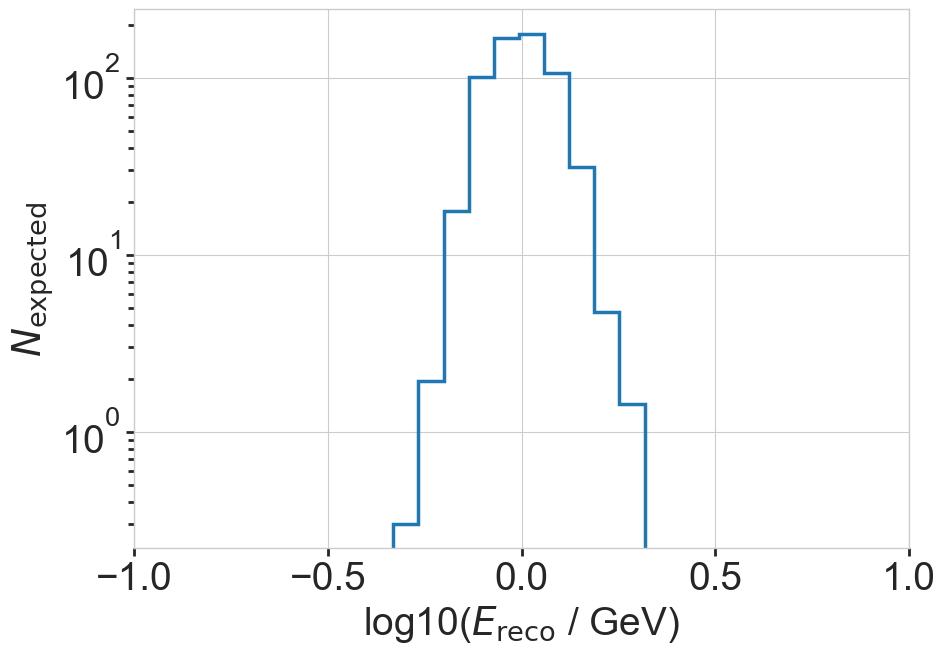

In [21]:
mask = events['true_energy'] > 5
mask = np.logical_and(mask, events['true_energy'] < 10)

plt.hist(np.log10(events['reco_energy'][mask]), weights=events['weights'][mask], histtype='step', lw=2.5)
plt.yscale('log')
plt.xlabel(r'log10($E_{\rm reco}$ / GeV)')
plt.ylabel(r'$N_{\rm expected}$')
plt.xlim(-1., 1.)

# Histograms

In [22]:
bin_edges = np.logspace(-1., 1., 20)
# bin_edges

In [23]:
bin_idx = np.digitize(events['reco_energy'], bin_edges)

In [24]:
hist = np.bincount(bin_idx, weights=events['weights'], minlength=len(bin_edges)+1)
# hist

Text(0, 0.5, '$N_{\\rm events}$')

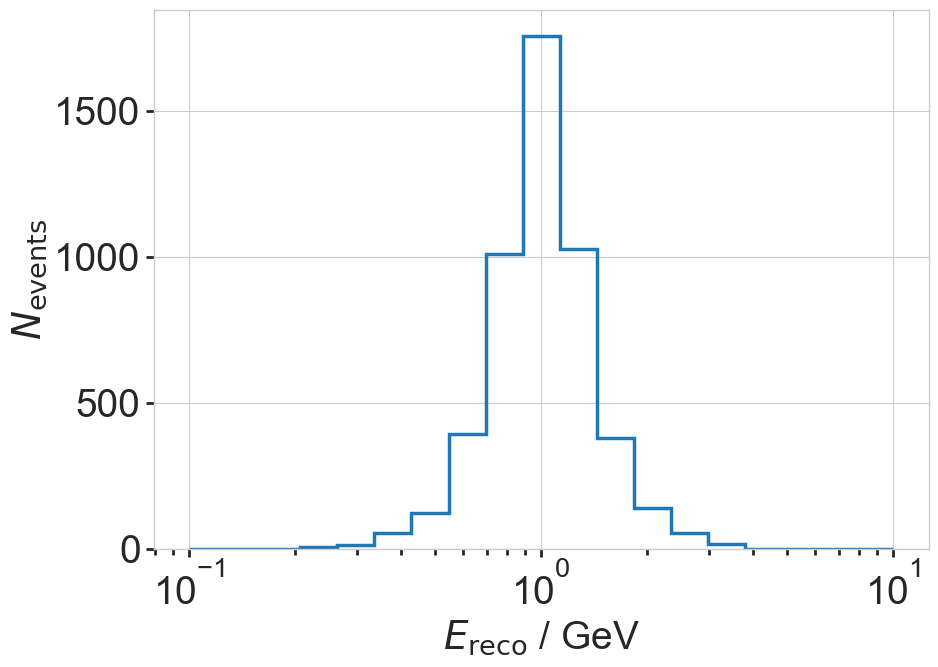

In [25]:
# first and last bin are overflow bins in hist
plt.stairs(hist[1:-1], bin_edges, lw=2.5)
plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

## Test different detector responses:

In [26]:
responses = {
    "1": Response(0., 0.1),
    "2": Response(0.1, 0.1),
    "3": Response(-0.1, 0.1),
    "4": Response(0.2, 0.2),
    "5": Response(0.5, 0.2),
}

# # use a hard index here to magnifiy effect of oscillation valley
# index = 1.3

In [27]:
discrete_sets = {}
for k,r in responses.items():
    discrete_sets[k] = Generator(100000, r)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [28]:
bin_edges = np.logspace(-1., 2., 26)

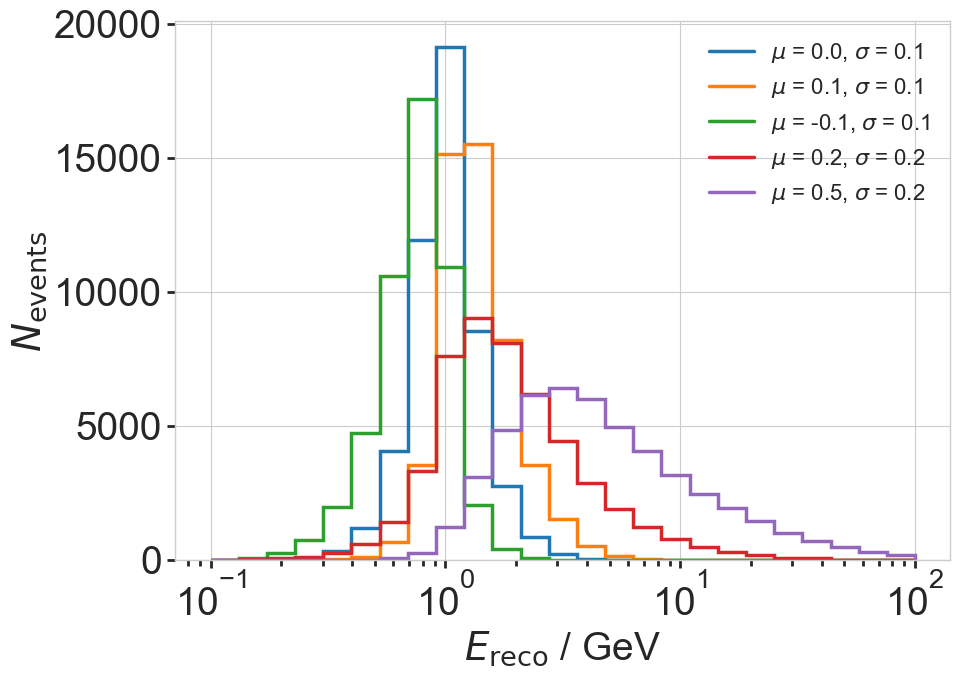

In [29]:
for k, gen in discrete_sets.items():
    events = gen.get_events()
    bin_idx = np.digitize(events['reco_energy'], bin_edges)
    hist = np.bincount(bin_idx, weights=events['weights'], minlength=len(bin_edges)+1)
    # first and last bin are overflow bins in hist
    plt.stairs(hist[1:-1], bin_edges, label=fr"$\mu$ = {responses[k].mu}, $\sigma$ = {responses[k].sigma}", lw=2.5)

plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend(loc='upper right')